In [9]:
import pandas as pd
entertainment_data = pd.read_csv("C:\\Users\\DIGITALDREAM CYBER\\Downloads\\Education_attainment.csv")
entertainment_data

,Year,Sex,Min degree,total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920.0,A,high school,---,22.0,6.3,---,---,---,---,---
1,1940.0,A,high school,38.1,41.2,12.3,---,---,---,---,---
2,1950.0,A,high school,52.8,56.3,23.6,---,---,---,---,---
3,1960.0,A,high school,60.7,63.7,38.6,---,---,---,---,---
4,1970.0,A,high school,75.4,77.8,58.4,---,---,---,---,---
...,...,...,...,...,...,...,...,...,...,...,...
211,2016.0,F,master's,11.2,12.3,6.3,6.3,28.8,---,---,8.2
212,2017.0,F,master's,10.5,11.8,6.8,5,25.8,---,---,5.4
213,2018.0,F,master's,10.7,12.6,6.2,3.8,29.9,---,---,---
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
entertainment_data['Year'].unique()

array([1920., 1940., 1950., 1960., 1970., 1980., 1990., 1995., 2000.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018.,   nan,    6.])

In [6]:
b1980=entertainment_data[entertainment_data['Year'].astype(float).eq(1980)&entertainment_data['Min degree'].eq("bachelor's")][['Sex', 'total']]
print(b1980)

    Sex total
44    A  22.5
112   M    24
180   F    21


In [15]:
subset=entertainment_data[(entertainment_data['Year']>=2000) & (entertainment_data['Year']<=2010)]
counts=subset['Min degree'].value_counts()
(counts.head(2))

Min degree
high school    21
associate's    21
Name: count, dtype: int64

In [16]:
b2000 = entertainment_data[(entertainment_data['Year'] == 2000) & (entertainment_data['Min degree'] == "bachelor's") & (entertainment_data['Sex'] == 'A')]['total']
b2010 = entertainment_data[(entertainment_data['Year'] == 2010) & (entertainment_data['Min degree'] == "bachelor's") & (entertainment_data['Sex'] == 'A')]['total']
b2000 = pd.to_numeric(b2000, errors='coerce')
b2010 = pd.to_numeric(b2010, errors='coerce')
difference = b2010.values[0] - b2000.values[0]

print("Bachelor's total in 2000:", b2000.values[0])
print("Bachelor's total in 2010:", b2010.values[0])
print("Difference:", difference)

Bachelor's total in 2000: 29.1
Bachelor's total in 2010: 31.7
Difference: 2.599999999999998


In [18]:
numeric_cols = ['total','White','Black','Hispanic','Asian','Pacific Islander',
                'American Indian/Alaska Native','Two or more races']

entertainment_data[numeric_cols] = entertainment_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
stats = entertainment_data.describe()
(stats)

,Year,total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
count,215.000000,212.000000,214.000000,214.000000,204.000000,168.000000,93.000000,131.000000,157.000000
mean,1996.176744,42.771226,47.210280,35.188318,27.675000,62.020238,50.786022,42.667176,44.457962
std,137.248347,30.145454,31.322836,32.355828,26.853377,27.026613,33.240224,32.097566,31.578896
min,6.000000,4.100000,4.500000,1.100000,0.600000,15.000000,10.000000,2.100000,2.900000
25%,2005.000000,22.125000,22.300000,10.125000,7.600000,46.550000,24.000000,16.550000,25.700000
50%,2010.000000,36.100000,42.650000,23.200000,16.600000,66.000000,34.000000,24.400000,34.700000
75%,2014.000000,84.400000,85.900000,70.625000,57.025000,81.050000,90.700000,83.050000,87.900000
max,2018.000000,94.000000,96.400000,93.500000,87.200000,98.500000,100.000000,95.100000,98.200000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

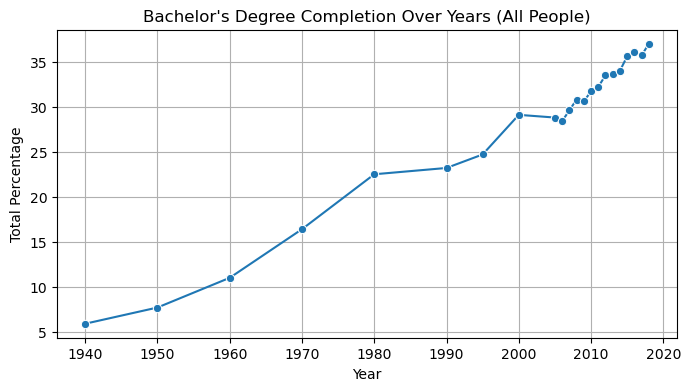

In [23]:
bachelors_all = entertainment_data[(entertainment_data['Min degree'] == "bachelor's") & (entertainment_data['Sex'] == 'A')]

plt.figure(figsize=(8,4))
sns.lineplot(data=bachelors_all, x='Year', y='total', marker='o')
plt.title("Bachelor's Degree Completion Over Years (All People)")
plt.xlabel("Year")
plt.ylabel("Total Percentage")
plt.grid(True)
plt.show()

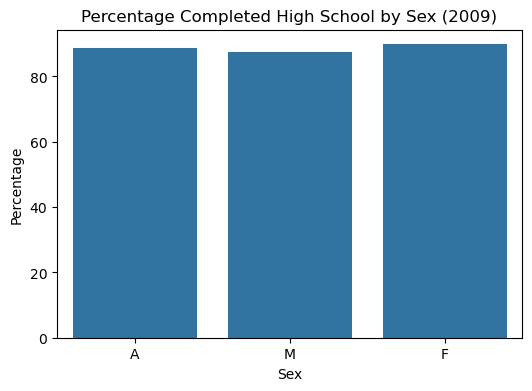

In [25]:
hs2009 =  entertainment_data[( entertainment_data['Year'] == 2009) & ( entertainment_data['Min degree'] == "high school")]

plt.figure(figsize=(6,4))
sns.barplot(data=hs2009, x='Sex', y='total')
plt.title("Percentage Completed High School by Sex (2009)")
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.show()